In [29]:
import pandas as pd
from scipy.stats import norm, kstwobign

df = pd.read_csv("resources/kc_house_data.csv")
alpha = 0.05

### Задание 1

$H_0$: $F(x) = \Phi(\frac {x - \mu} {\sigma})$ - то есть значения выборки распределены нормально

$H_1$: $F(x) \neq \Phi(\frac {x - \mu} {\sigma})$ - то есть данные имеют какое-то другое распределение

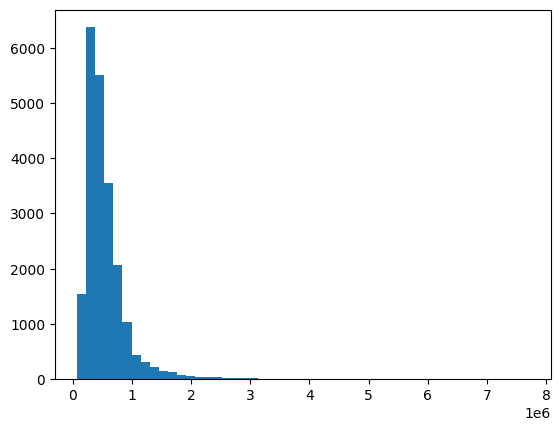


Результаты критерия Колмогорова:
Статистика D_n = 21.423869
Критическое значение K_alpha = 1.3581 (для α = 0.05)
p-value = 0.0000
Reject H_0


In [30]:
import matplotlib.pyplot as plt
import numpy as np

data = df['price'].values

mu = np.mean(data)
sigma = np.std(data)

plt.hist(df['price'], bins=50)
plt.show()

sorted_data = np.sort(data)
n = len(data)

max_diff = 0
for i in range(n):
    count = np.sum(sorted_data <= sorted_data[i])
    F_emp = count / n
    F_theor = norm.cdf(sorted_data[i], mu, sigma)
    diff = abs(F_emp - F_theor)
    if diff > max_diff:
        max_diff = diff

D_n = np.sqrt(n) * max_diff

K_alpha = kstwobign.ppf(1 - alpha)

p_value = 1 - kstwobign.cdf(D_n)

print(f"\nРезультаты критерия Колмогорова:")
print(f"Статистика D_n = {D_n:.6f}")
print(f"Критическое значение K_alpha = {K_alpha:.4f} (для α = {alpha})")
print(f"p-value = {p_value:.4f}")

if D_n > K_alpha:
    print("Reject H_0")
else:
    print("Accept H_0")

In [31]:
import numpy as np
from scipy.stats import chisquare, norm

n = len(data)

k = int(np.sqrt(n))

bins = np.linspace(np.min(data), np.max(data), k + 1)

observed, _ = np.histogram(data, bins=bins)

cdf_vals = norm.cdf(bins, loc=mu, scale=sigma)
expected = n * np.diff(cdf_vals)

observed = observed[expected > 0]
expected = expected[expected > 0]

expected = expected * (observed.sum() / expected.sum())

chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

alpha = 0.05

print("\nКритерий согласия χ²:")
print(f"Статистика χ² = {chi_stat:.6f}")
print(f"p-value = {p_value:.4f}")

if p_value < alpha:
    print("Reject H₀")
else:
    print("Accept H₀")


Критерий согласия χ²:
Статистика χ² = 1800448822176.353760
p-value = 0.0000
Reject H₀


### Задание 2

$H_0$: $F_{old}(x) = F_{fresh}(x)$ - то есть элементы двух выборок распределены одинаково

$H_1$: $F_{old}(x) \neq F_{fresh}(x)$ - выборки имеют разные распределения

In [32]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency
year = 1945

old_data = df[df['yr_built'] < year]['price'].to_numpy()
fresh_data = df[df['yr_built'] >= year]['price'].to_numpy()

all_data = np.concatenate([old_data, fresh_data])

n1 = len(old_data)
n2 = len(fresh_data)

k = int(np.sqrt(n1 + n2))

bins = np.linspace(all_data.min(), all_data.max(), k + 1)

old_counts, _ = np.histogram(old_data, bins=bins)
fresh_counts, _ = np.histogram(fresh_data, bins=bins)

mask = (old_counts + fresh_counts) > 0
old_counts = old_counts[mask]
fresh_counts = fresh_counts[mask]

cont = np.vstack([old_counts, fresh_counts])

row_sums = cont.sum(axis=1)
col_sums = cont.sum(axis=0)
total = cont.sum()

expected = np.zeros_like(cont, dtype=float)
for i in range(2):
    for j in range(cont.shape[1]):
        expected[i, j] = row_sums[i] * col_sums[j] / total

chi2_c = ((cont - expected) ** 2 / expected).sum()
critical = chi2.ppf(1 - alpha, df = (2 - 1) * (cont.shape[1] - 1))

if chi2_c > critical:
    print("Выборки зависимы (считаем руками)")
else:
    print("Выборки независимы (считаем руками)")


contingency = np.column_stack((old_counts, fresh_counts))

chi2_stat, p_value, df_chi, expected = chi2_contingency(contingency)

if p_value < alpha:
    print("Выборки зависимы (считаем библиотекой)")
else:
    print("Выборки независимы (считаем библиотекой)")


Выборки зависимы (считаем руками)
Выборки зависимы (считаем библиотекой)


In [33]:
year = 1945
old_data = df[df['yr_built'] < year] 
fresh_data = df[df['yr_built'] >= year]

sorted_old = np.sort(old_data['price'])
sorted_fresh = np.sort(fresh_data['price'])
n = len(sorted_old)
m = len(sorted_fresh)

alpha = 0.05

max_diff = 0
for i in range(n + m):
    count_old = np.sum(sorted_old <= sorted_data[i])
    count_fresh = np.sum(sorted_fresh <= sorted_data[i])
    diff = abs(count_old / n - count_fresh / m)
    if diff > max_diff:
        max_diff = diff

D = np.sqrt(n*m / (n + m)) * max_diff

K_alpha =  kstwobign.ppf(1 - alpha)

p_value = 1 - kstwobign.cdf(D)

print(f"\nРезультаты критерия Колмогорова–Смирнова:")
print(f"Статистика D = {D:.6f}")
print(f"Критическое значение K_alpha = {K_alpha:.4f} (для α = {alpha})")
print(f"p-value = {p_value:.4f}")

if D > K_alpha:
    print("Reject H_0")
else:
    print("Accept H_0")


Результаты критерия Колмогорова–Смирнова:
Статистика D = 4.425575
Критическое значение K_alpha = 1.3581 (для α = 0.05)
p-value = 0.0000
Reject H_0


Изначально применялся критерий Смирнова. Но, вспомнив, что обязательным условием являеься независимость, мы ее проверили.

Неожиданно оказалось, что ее нет. Независимость проверялась критерием хи-квадрат. Он был реализован самостоятельно, а также использован встроенный. оба решения показали, что независимоти нет.

Поэтому, на основании теста отрицательного результата теста Смирнова нельзя утверждать, что выборки одинакого распределены.

Критерий, не требующий независимость, реализован во второй части задания.

In [34]:
import numpy as np
from scipy.stats import chi2_contingency

year = 1945

old_data = df[df['yr_built'] < year]['price'].to_numpy()
fresh_data = df[df['yr_built'] >= year]['price'].to_numpy()

n = len(old_data)
m = len(fresh_data)
k = int(np.sqrt(n + m))

all_data = np.concatenate([old_data, fresh_data])
bins = np.linspace(all_data.min(), all_data.max(), k + 1)

old_counts, _ = np.histogram(old_data, bins=bins)
fresh_counts, _ = np.histogram(fresh_data, bins=bins)

cont = np.vstack([old_counts, fresh_counts])

mask = cont.sum(axis=0) > 0
cont = cont[:, mask]

chi2, p_value, dof, expected = chi2_contingency(cont)

alpha = 0.05

print("\nКритерий однородности χ²:")
print(f"χ² = {chi2:.6f}")
print(f"p-value = {p_value:.6f}")
print(f"df = {dof}")

if p_value < alpha:
    print("Reject H₀")
else:
    print("Accept H₀")


Критерий однородности χ²:
χ² = 313.046243
p-value = 0.000000
df = 80
Reject H₀


### Задание 3

$H_0$: - $\rho_s \le 0$ - то есть нет корреляции между ценой и жилой площадью, либо она отрицательна

$H_1$: - $\rho_s > 0$ - есть положительная корреляция

In [35]:
import math

sqft = df["sqft_living"]
price = df["price"]
rank_sqft = sqft.rank(method='average')
rank_price = price.rank(method='average')
n = len(rank_price)
s = 0
for i in range(n):
    s += (rank_price[i] - (n+1)/2) * (rank_sqft[i] - (n+1)/2)

s *= 12/(n * (n**2-1))

s0 = 0
for i in range(n):
    s0 += (rank_price[i] - rank_sqft[i])**2
s0= 1 - s0 *6/(n * (n**2-1))

p_value = 1 - norm.cdf(s, loc = 0, scale = 1/math.sqrt(n - 1))

critical_value = norm.ppf(1-alpha, loc = 0, scale = 1/math.sqrt(n - 1))

print("Результаты теста Спирмена:")
print(f"статистика rho = {s0:.6f}")
print(f"критическое значение critical_value = {critical_value:.6f}")
print(f"p-value = {p_value:.6f}")

if p_value < alpha:
    print(f"Reject H_0")
else:
    print(f"Accept H_0")

Результаты теста Спирмена:
статистика rho = 0.644195
критическое значение critical_value = 0.011189
p-value = 0.000000
Reject H_0


In [36]:
from scipy.stats import kendalltau

sqft = df["sqft_living"]
price = df["price"]

tau, p_value = kendalltau(sqft, price)

print("Результаты теста Кендалла:")
print(f"статистика tau = {tau:.6f}")
print(f"p-value = {p_value:.6f}")

alpha = 0.05

if p_value < alpha:
    print("Reject H₀")
else:
    print("Accept H₀")

Результаты теста Кендалла:
статистика tau = 0.463611
p-value = 0.000000
Reject H₀
